# matplotlinb 입문

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
# 데이터 준비
import seaborn as sns
df_iris = sns.load_dataset("iris") 

In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 단순 방식 (plt.xxx 함수 사용)

#### 산점도

In [6]:
# 산점도 x좌표를 위한 시리즈
xs = df_iris['sepal_length']

# 산점도 y좌표를 위한 시리즈
ys = df_iris['sepal_width']

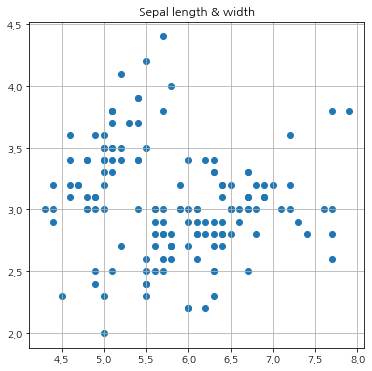

In [7]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)

plt.title('Sepal length & width')
# 산점도 그리기
plt.scatter(xs, ys)

# 화면에 출력
plt.show()

#### 함수의 그래프

In [8]:
# 데이터 준비

# 시그모이드 함수 정의
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

# 그래프 x좌표를 위한 리스트
xp = np.linspace(-3, 3, 61)

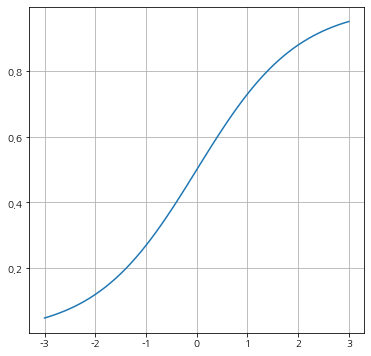

In [9]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)

# 그래프 그리기
plt.plot(xp, sigmoid(xp, 1.0))

# 화면에 출력
plt.show()

#### 복잡한 예

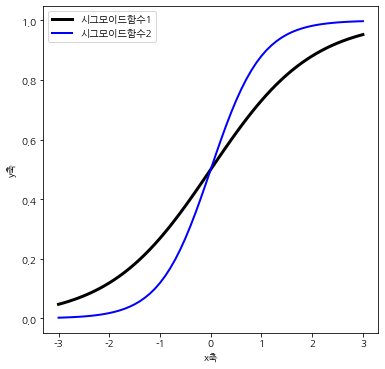

In [10]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)

# 레이블이 달린 그래프 그리기 #1
plt.plot(xp, sigmoid(xp, 1.0), 
         label='시그모이드함수1', lw=3, c='k')

# 레이블이 달린 그래프 그리기 #2
plt.plot(xp, sigmoid(xp, 2.0), 
         label='시그모이드함수2', lw=2, c='b')

# 눈금 그리기
plt.grid()

# 범례 그리기
plt.legend()

# 축 표시
plt.xlabel('x축')
plt.ylabel('y축')

# 화면 출력
plt.show()

### 3차 함수 `f(x) = (x-2) x (x+2)` 그리기

In [4]:
def f(x):
    return (x - 2) * x * (x + 2)

In [5]:
print(f(1))

-3


In [6]:
print(f(np.array([1,2,3])))

[-3  0 15]


샘플 x 데이터 생성

In [7]:
x = np.arange(-3, 3.5, 0.5)
print(x)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [8]:
x = np.linspace(-3, 3, 10)
print(np.round(x,2))

[-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]


In [9]:
y = f(x)

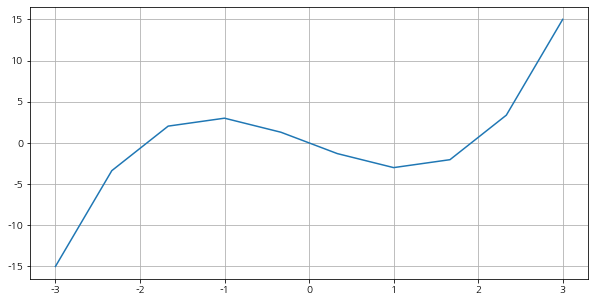

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()

## 2. fig, ax 변수를 사용하는 방식

#### 시계열 그래프 그리기

In [ ]:
# 데이터 준비

# 아이스크림 지출액
df_ice = pd.read_excel('https://github.com/flourscent\
/sample-data/blob/master/data/ice-sales.xlsx?raw=true', 
    sheet_name=0)

# 결과 확인
display(df_ice.head())

In [ ]:
# ax 변수를 구하기
# 그래프 크기 설정도 겸한다
fig, ax = plt.subplots(figsize=(12, 4))

# 그래프 그리기
ax.plot(df_ice['연월'], df_ice['지출'], c='b')

# 날짜 설정용 라이브러리
import matplotlib.dates as mdates

# 눈금 간격을 3개월로 설정
days = mdates.MonthLocator(bymonth=range(1,13,3))
ax.xaxis.set_major_locator(days)

# x축의 레이블을 90도 회전
ax.tick_params(axis='x', rotation=90)

# 눈금 표시
ax.grid()

# 화면 출력
plt.show()

## 3. ax 변수를 사용하는 방식 2 (그래프 영역을 여러 개 만드는 경우)

#### 여러 개의 그래프 영역에 그래프 그리기

In [ ]:
# 데이터 준비

# 손글씨 데이터
# 시간이 오래 걸릴 수 있으니 주의
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

# 이미지 데이터
image = mnist.data.values
# 정답 데이터
label = mnist.target

In [ ]:
# 그래프 크기 설정
plt.figure(figsize=(10, 3))

# 이미지 20장을 출력
for i in range(20): 
    
    # i번째 ax 변수를 얻음
    ax = plt.subplot(2, 10, i+1)
    
    # i번째 이미지 데이터를 28x28 크기로 변환
    img = image[i].reshape(28,28)
    
    # img를 이미지로 그림
    ax.imshow(img, cmap='gray_r')
    
    # 정답 데이터를 타이틀로 표시
    ax.set_title(label[i])
    
    # x, y 눈금 표시하지 않음
    ax.set_xticks([])
    ax.set_yticks([])
    
# 인접 오브젝트와 부딪히지 않게 함
plt.tight_layout()

# 화면 출력
plt.show() 

## 4. 데이터프레임을 이용하는 방식

#### 데이터프레임으로 히스토그램 그리기

In [ ]:
# 히스토그램 그리기

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (8, 8)

# 히스토그램 그리기
df_iris.hist()

# 화면 출력
plt.show()

#### 시리즈를 사용한 막대그래프 그리기

In [ ]:
# 데이터 준비

# df_iris['sepal_width']의 값마다 건수를 집계하고 상위 5가지를 뽑음
counts_ser = df_iris['sepal_width'].value_counts().iloc[:5]

# 결과 확인
print(counts_ser)

In [ ]:
# value_counts 함수의 실행 결과로 막대그래프 그리기

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (4, 4)

# 시리즈 데이터를 사용해 막대그래프 그리기
counts_ser.plot(kind='bar')

# 화면 출력
plt.show()

### plot Kind

여러 형식별 플로팅 메서드를 제공하고 또는 [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 에 메서드 명과 같은 **`kind`** 매개변수에 플롯 종류를 지정할 수 있다. 

- [line](#plot) : line plot (default)
- ‘bar’ or ‘barh’ for bar plots
- ‘barh’ : horizontal bar plot
- ‘hist’ for histogram
- [box](#boxplot): for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘density’ : same as ‘kde’
- ‘area’ for area plots
- ‘pie’ for pie plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots

# 한글 사용

- 사용가능한 폰트 확인, TTF 폰트 설치 방법
- matplotlib 텍스트 출력시 폰트 특성을 지정 (FontProperties)
- matplotlib 전역으로 한글 글꼴 지정(rcParams)

### 폰트 찾기

In [31]:
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


### rcPrams 사용 전역

Text(0.5, 1.0, '한글 타이틀...')

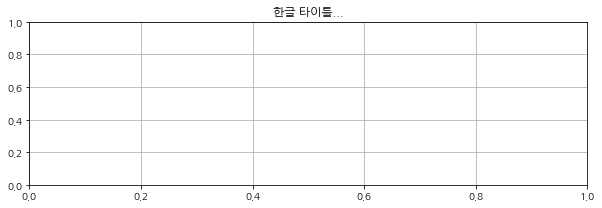

In [3]:
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
plt.rcParams["font.family"] = fontname

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

### 그래프에 FontProperties 객체 사용

한글 표현을 사용하는 그래프에서만 사용한다.

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fp = fm.FontProperties(fname=path, size=18)

prices = np.random.randn(100).cumsum()

plt.plot(prices, '-')
plt.title('가격추이', fontproperties=fp)
plt.xlabel('일자', fontproperties=fp)
plt.ylabel('가격', fontproperties=fp)
```

